##RICE PEST & DISEASES

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive')
from __future__ import absolute_import, print_function,division, unicode_literals
import os.path
import glob
import shutil

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras

import numpy as np
import matplotlib.pyplot as plt
import pathlib

Mounted at /content/drive


In [ ]:
BATCH_SIZE = 8
IMG_HEIGHT = 224
IMG_WIDTH = 224

#Load Data

In [ ]:
data_dir ="/content/drive/MyDrive/Hackaton BI /rice_leaf_diseases"
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['Leaf Blight','Brown Spot','Leaf Smut'])

print('Class Names: ', CLASS_NAMES)

Class Names:  ['Leaf Blight' 'Brown Spot' 'Leaf Smut']


In [ ]:
train_path = '/content/drive/MyDrive/Hackaton BI /rice_leaf_diseases'
test_path = '/content/drive/MyDrive/Hackaton BI /rice_leaf_diseases'

In [ ]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_path,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(test_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='sparse')

Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [ ]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

#Plot Train & Val Images

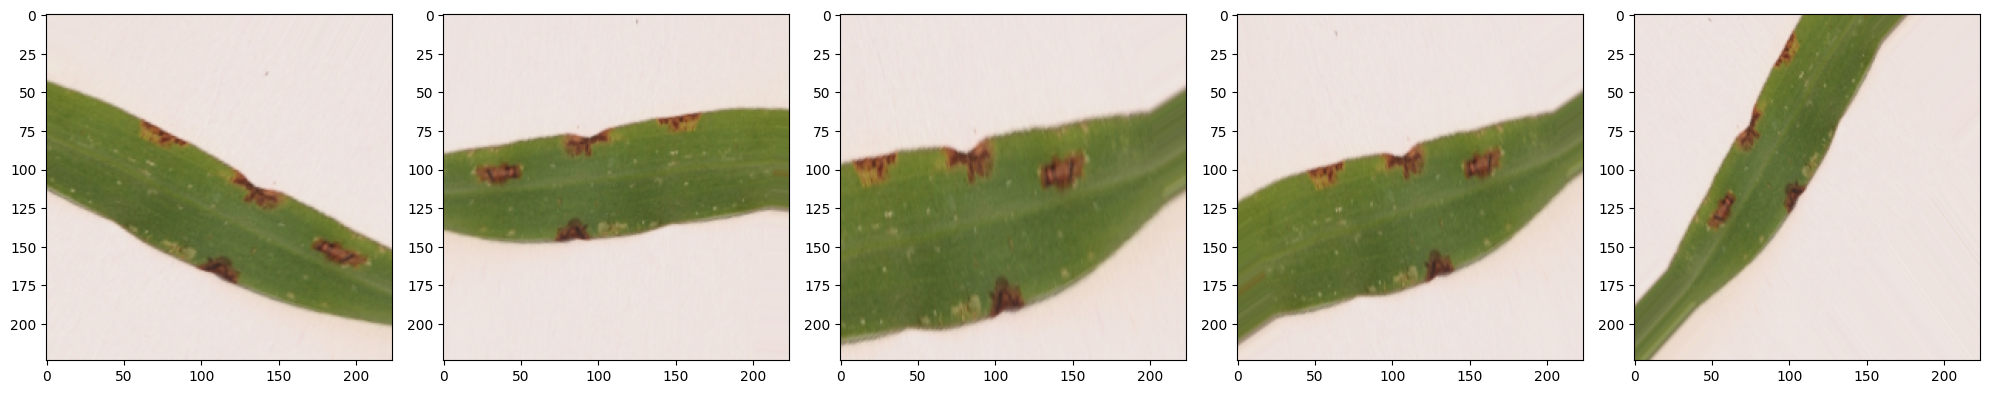

In [ ]:
# training images
img_array = [train_data_gen[0][0][0] for i in range(6)]
plotImages(img_array)

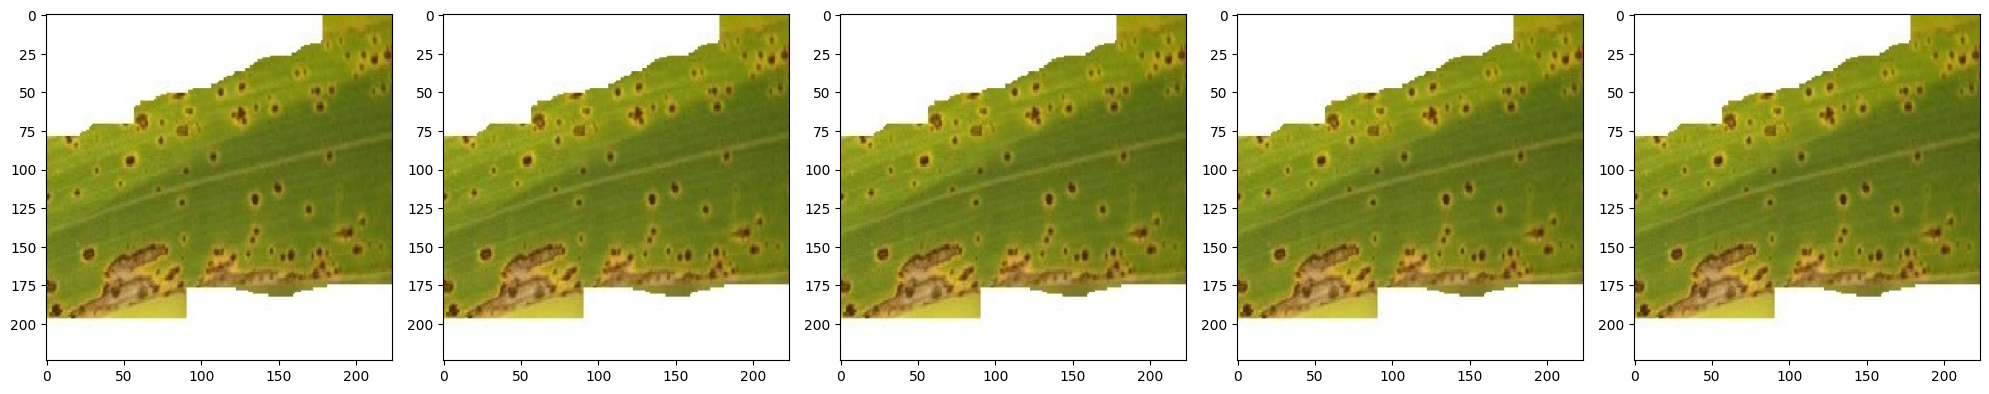

In [ ]:
# val images
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

#Model Building

In [ ]:
# Model building
#Instatiating A convnet

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [ ]:
EPOCHS=70
history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)

<ipython-input-10-7786d5f387fe>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)


Epoch 1/70
15/15 [==============================] - 80s 6s/step - loss: 1.2727 - accuracy: 0.3250 - val_loss: 1.0511 - val_accuracy: 0.4583
Epoch 2/70
15/15 [==============================] - 13s 858ms/step - loss: 1.1040 - accuracy: 0.3500 - val_loss: 1.0574 - val_accuracy: 0.5917
Epoch 3/70
15/15 [==============================] - 13s 868ms/step - loss: 1.0661 - accuracy: 0.3917 - val_loss: 1.0090 - val_accuracy: 0.6000
Epoch 4/70
15/15 [==============================] - 12s 839ms/step - loss: 1.0497 - accuracy: 0.5000 - val_loss: 0.9234 - val_accuracy: 0.5083
Epoch 5/70
15/15 [==============================] - 13s 859ms/step - loss: 0.9872 - accuracy: 0.4583 - val_loss: 0.8787 - val_accuracy: 0.6333
Epoch 6/70
15/15 [==============================] - 13s 857ms/step - loss: 0.9190 - accuracy: 0.5667 - val_loss: 0.7838 - val_accuracy: 0.5583
Epoch 7/70
15/15 [==============================] - 13s 866ms/step - loss: 0.9346 - accuracy: 0.5167 - val_loss: 0.8780 - val_accuracy: 0.5833
Ep

#Training & Validation

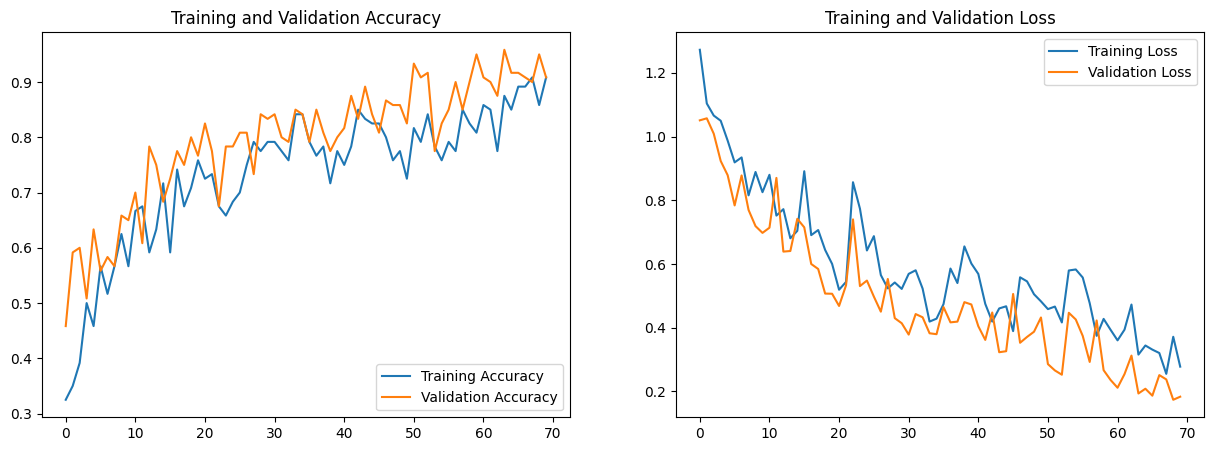

In [ ]:
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()